In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
%matplotlib inline

# 2. Reading the dataset

In [2]:
df = pd.read_csv('flavors_of_cacao.csv')
df.head(3)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo


In [781]:
df.rename(columns={df.columns[0]: "CompanyName"},inplace=True)
df.rename(columns={df.columns[1]: "BeanOrigin"},inplace=True)
df.rename(columns={df.columns[3]: "ReviewDate"},inplace=True)
df.rename(columns={df.columns[4]: "CocoaPercent"},inplace=True)
df.rename(columns={df.columns[5]: "CompanyLocation"},inplace=True)
df.rename(columns={df.columns[7]: "BeanType"},inplace=True)
df.rename(columns={df.columns[8]: "BroadBeanOrigin"},inplace=True)
df.head(3)

,CompanyName,BeanOrigin,REF,ReviewDate,CocoaPercent,CompanyLocation,Rating,BeanType,BroadBeanOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo


#### Delete any entries containing missing values

In [782]:
df_clean= df.dropna(inplace=False)
df_clean.isna().sum()

CompanyName        0
BeanOrigin         0
REF                0
ReviewDate         0
CocoaPercent       0
CompanyLocation    0
Rating             0
BeanType           0
BroadBeanOrigin    0
dtype: int64

# 3. Exploring the Dataset
- How many tuples are there in the dataset?
- How many unique company names are there in the dataset?
- How many reviews are made in 2013 in the dataset?
- In the BeanType Column, how many missing values are there?

In [783]:
nr_tuples = df_clean.shape[0]
unique_companies = df_clean.iloc[:,1].unique()
nr_unique_companies = len(unique_companies)
nr_reviews_2013 = sum(df_clean.iloc[:,3] == 2013)

print("Nr. Tuples: ", nr_tuples)
print("Nr. unique companies: ", nr_unique_companies)
print("Nr. reviews in 2013: ", nr_reviews_2013)

Nr. Tuples:  1793
Nr. unique companies:  1038
Nr. reviews in 2013:  184


In [784]:
#df.iloc[:,7].unique()
missing_sel = df.iloc[:,7] == '\xa0'
df.loc[missing_sel, "BeanType"] = np.NAN
nr_na_bean_type = df.iloc[:,7].isna().sum()
print("Nr. Missing Values in Bean Type column: ", nr_na_bean_type)

Nr. Missing Values in Bean Type column:  888


# 4. Visualization

## Plot distribution of the Rating feature

In [785]:
df_clean['Rating'].unique()

array([3.75, 2.75, 3.  , 3.5 , 4.  , 3.25, 2.5 , 5.  , 1.75, 1.5 , 2.25,
       2.  , 1.  ])

Text(0, 0.5, 'Nr. Chocolate Bars')

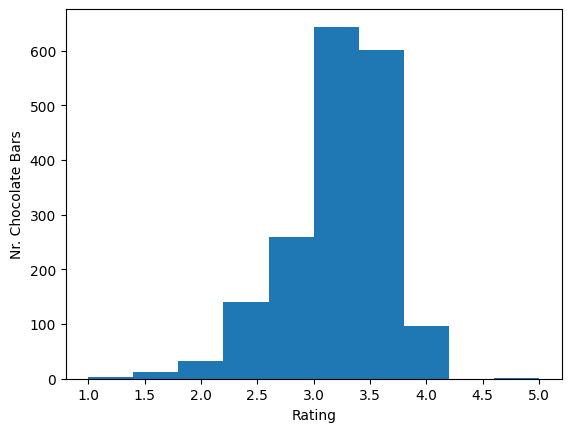

In [786]:
plt.hist(df_clean['Rating'])
plt.xlabel("Rating")
plt.ylabel("Nr. Chocolate Bars")

## Convert Cocoa% from str to float

In [787]:
map = np.full((len(df_clean), 1), True, dtype=bool)
df_clean.loc[map, 'CocoaPercent'] = df_clean['CocoaPercent'].apply(lambda val:float(val.replace("%", "")))

(array([  2.,   2.,  27., 190., 778., 560., 145.,  54.,  13.,  22.]),
 array([ 42. ,  47.8,  53.6,  59.4,  65.2,  71. ,  76.8,  82.6,  88.4,
         94.2, 100. ]),
 <BarContainer object of 10 artists>)

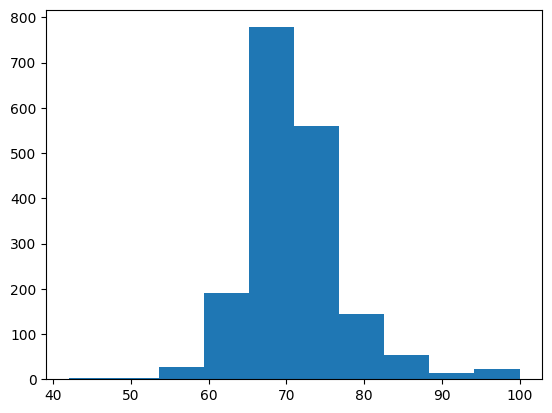

In [788]:
#sns.displot(df_clean['Cocoa\nPercent'],kde=True)
plt.hist(df_clean['CocoaPercent'])

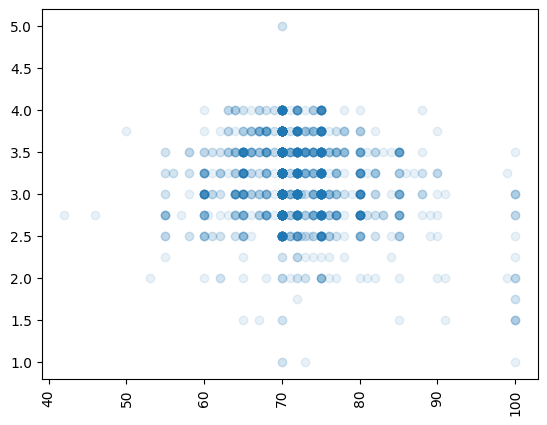

In [789]:
plt.scatter(df_clean['CocoaPercent'], df_clean['Rating'], alpha=0.1)
plt.xticks(rotation = 90);

<Axes: xlabel='Rating', ylabel='CocoaPercent'>

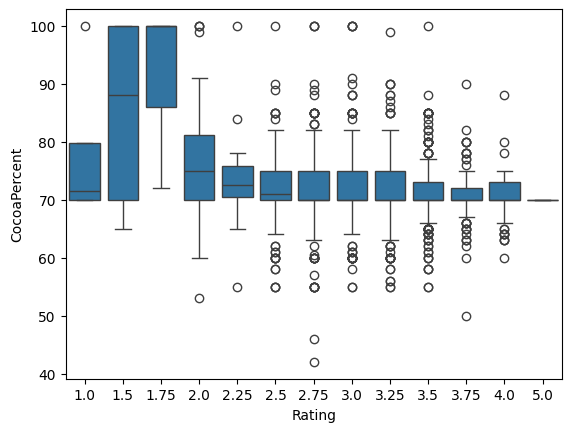

In [790]:
sns.boxplot(df_clean, x='Rating', y='CocoaPercent')

In [791]:
res = stats.pearsonr(df_clean['CocoaPercent'], df_clean['Rating'])
corr_coeff = res.statistic
print(corr_coeff)

-0.16475831754562745


## Conclusions
- All the top rated chocolates have a cocoa percentage of 70%
- Cocoa percentage and rating are negatively correlated (rho = -0.16) 

# 6. Normalization

(array([  4.,  13.,  32., 140., 259., 644., 602.,  97.,   0.,   2.]),
 array([-4.5761145 , -3.73871211, -2.90130972, -2.06390733, -1.22650494,
        -0.38910255,  0.44829984,  1.28570224,  2.12310463,  2.96050702,
         3.79790941]),
 <BarContainer object of 10 artists>)

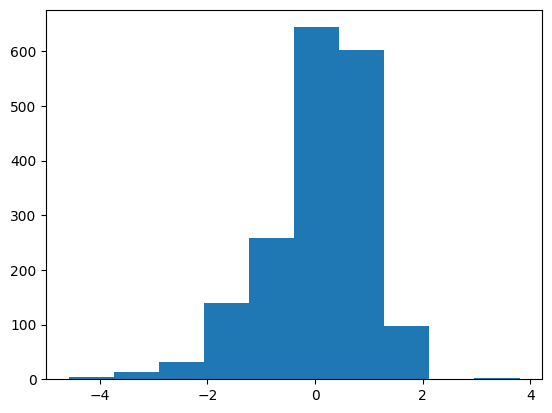

In [792]:
scaler = StandardScaler()
rate_norm = (df_clean['Rating']-df_clean['Rating'].mean())/df_clean['Rating'].std()
plt.hist(rate_norm)

# 7. Challenge, group by a column and get mean from another column

In [793]:
print(df_clean.groupby('CompanyName')['Rating'].mean())

CompanyName
A. Morin                  3.380435
AMMA                      3.500000
Acalli                    3.750000
Adi                       3.250000
Aequare (Gianduja)        2.875000
                            ...   
hello cocoa               3.125000
hexx                      3.050000
iQ Chocolate              2.875000
organicfair               2.850000
twenty-four blackbirds    3.041667
Name: Rating, Length: 416, dtype: float64


# 8. Encoding
The company’s names and locations are categorical, nominal data, therefore the one hot encoder is used.

In [795]:
enc = OneHotEncoder()
encoded_data = enc.fit_transform(df_clean[['CompanyName', 'CompanyLocation']])
encoded_data = encoded_data.toarray()
print(encoded_data)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
